### Word Cloud 
https://amueller.github.io/word_cloud/auto_examples/index.html
- fit_words(frequencies) : Create a word_cloud from words and frequencies.
- generate(text) : Generate wordcloud from text.
- generate_from_frequencies(frequencies[, …]) : Create a word_cloud from words and frequencies.
- generate_from_text(text) : - Generate wordcloud from text. : 
- process_text(text) : Splits a long text into words, eliminates the stopwords.

- https://www.datacamp.com/tutorial/wordcloud-python
- https://towardsdatascience.com/generate-meaningful-word-clouds-in-python-5b85f5668eeb


In [100]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import wordcloud as wc
import numpy as np
import seaborn as sns

### single word

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)
mask
wc(mask=mask)

In [101]:
text = "Data Analytics"

In [102]:
wc1 = wc.WordCloud(background_color="white", repeat=True)
wc1 = wc1.generate(text)  # from text

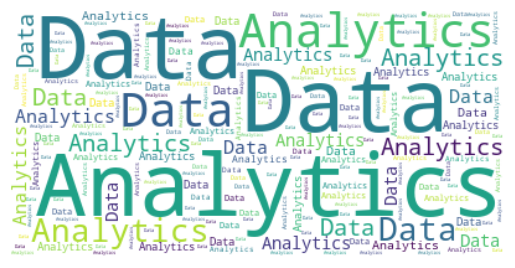

In [103]:
plt.axis("off")
plt.imshow(wc1, interpolation="bilinear")
plt.show()

In [ ]:
### Sentence

In [104]:
# sample
s1 = 'The quick brown fox jumps over the lazy little dog '
s14 = s1 * 4
s14

'The quick brown fox jumps over the lazy little dog The quick brown fox jumps over the lazy little dog The quick brown fox jumps over the lazy little dog The quick brown fox jumps over the lazy little dog '

In [105]:
stopwords = set(wc.STOPWORDS)
print(stopwords, '\t')

{"he's", "he'll", 'than', "i'm", 'too', 'if', 'where', 'over', 'his', 'into', 'those', 'i', 'itself', "she'll", 'they', 'cannot', 'on', 'at', 'out', "doesn't", 'no', 'am', 'myself', "weren't", 'with', 'for', "i've", "where's", 'again', 'some', 'so', "i'd", 'could', 'otherwise', 'more', "i'll", 'and', 'all', "shan't", 'your', "we'll", 'ours', 'r', 'were', 'hence', "who's", "they'll", 'have', 'theirs', 'him', "how's", 'is', 'which', 'what', 'yours', 'not', "he'd", 'yourselves', 'he', 'under', 'because', 'did', 'hers', 'like', 'that', 'had', 'it', "you've", "she'd", "isn't", "why's", 'to', 'ought', 'http', 'between', 'nor', 'each', 'against', 'but', 'about', "can't", "they're", 'whom', "hadn't", "let's", "they've", "couldn't", 'both', 'only', "they'd", "hasn't", 'same', 'you', "mustn't", 'in', 'down', 'com', 'k', 'an', 'be', "it's", 'being', 'them', 'are', "didn't", 'here', 'should', 'else', 'having', 'while', 'most', 'this', 'during', 'she', 'however', "when's", 'would', 'how', 'do', 'th

In [106]:
tokens1 = s14.split()
print(tokens1, '\t')

['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'little', 'dog', 'The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'little', 'dog', 'The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'little', 'dog', 'The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'little', 'dog'] 	


In [107]:
s2 = ' '.join(tokens1)
s2

'The quick brown fox jumps over the lazy little dog The quick brown fox jumps over the lazy little dog The quick brown fox jumps over the lazy little dog The quick brown fox jumps over the lazy little dog'

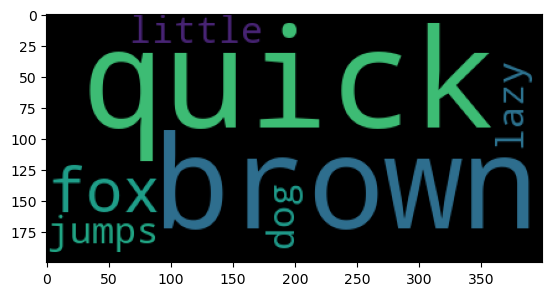

In [108]:
wc2 = wc.WordCloud().generate(s2)
plt.imshow(wc2)

### Word Cloud from Frequency
from collections import OrderedDict
wordDict = wordFreq.to_dict()
textDict = OrderedDict(sorted(wordDict.items()))
print(textDict, '\t')

In [121]:
wDF = pd.DataFrame(tokens1, columns = ['words'])
wDF[0:5]

,words
0,The
1,quick
2,brown
3,fox
4,jumps


In [123]:
wordFreq = wDF.groupby('words').size().to_frame('counts').reset_index()
wordFreq.head(2)  # columns should be words, counts

,words,counts
0,The,4
1,brown,4


In [174]:
textDict1 = wordFreq.to_dict('list')
print(textDict1 ,'\t')
#wc2 = wc.WordCloud(background_color="white")
#wc2 = wc2.generate_from_frequencies(frequencies = textDict1)

{'words': ['The', 'brown', 'dog', 'fox', 'jumps', 'lazy', 'little', 'over', 'quick', 'the'], 'counts': [4, 4, 4, 4, 4, 4, 4, 4, 4, 4]} 	


In [175]:
textDict2 = dict(zip(wordFreq.words, wordFreq.counts))
print(textDict2, '\t')

{'The': 4, 'brown': 4, 'dog': 4, 'fox': 4, 'jumps': 4, 'lazy': 4, 'little': 4, 'over': 4, 'quick': 4, 'the': 4} 	


In [176]:
wc2 = wc.WordCloud(background_color="white")
wc2 = wc2.generate_from_frequencies(frequencies = textDict2)

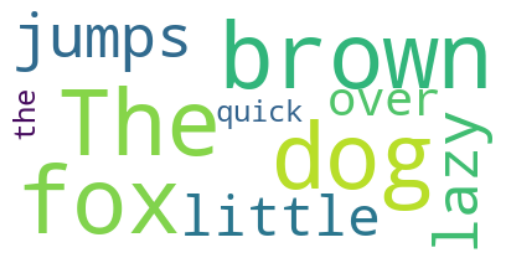

In [177]:
plt.axis("off")
plt.imshow(wc2, interpolation="bilinear")
plt.show()

In [180]:
### Generatge from Text

In [187]:
text = " ".join(w.split()[0] for w in wDF.words)
text

'The quick brown fox jumps over the lazy little dog The quick brown fox jumps over the lazy little dog The quick brown fox jumps over the lazy little dog The quick brown fox jumps over the lazy little dog'

In [188]:
wc3 = wc.WordCloud(collocations = False, background_color = 'white', font_step=2, min_font_size=5, include_numbers=True, 
                   scale=1, collocation_threshold=3, repeat = False, prefer_horizontal = .5, width = 500)
wc3 = wc3.generate(text)
#repeat T - show as many times the word occurs

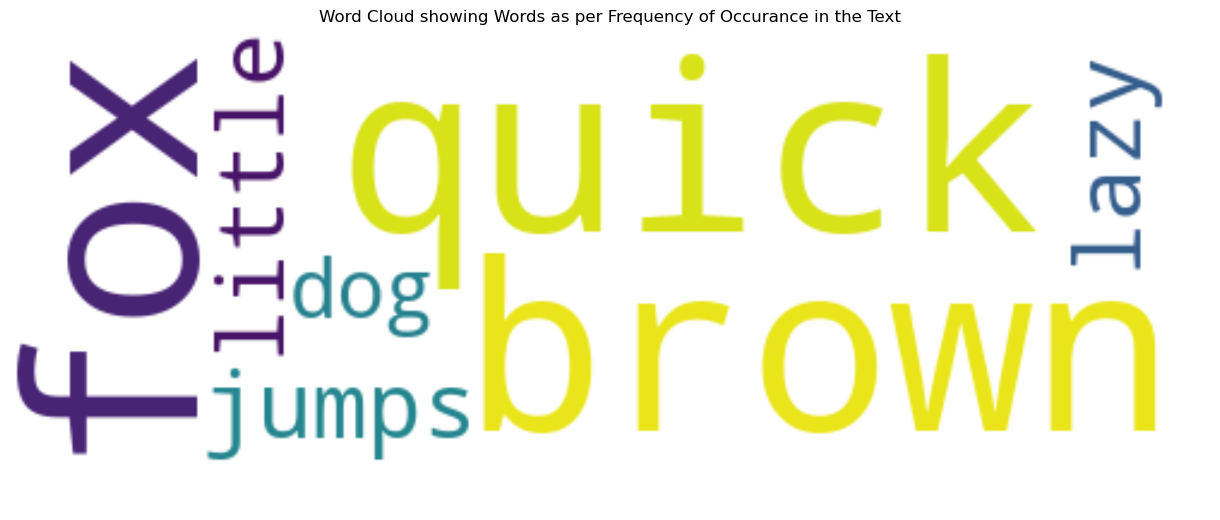

In [189]:
# Display the generated Word Cloud
plt.figure(figsize = (12, 8), facecolor = None)
plt.imshow(wc3, interpolation='bilinear')
plt.title('Word Cloud showing Words as per Frequency of Occurance in the Text')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show();

### WC Process
 process_text(text) : Splits a long text into words, eliminates the stopwords.
 https://www.g20.org/en/media-resources/speeches/march-23/eam/

In [196]:
wc5 = wc.WordCloud()
wc5 = wc5.process_text(text)

In [197]:
print(dir(wc5), '\t')

['__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__ior__', '__iter__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__or__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__ror__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'clear', 'copy', 'fromkeys', 'get', 'items', 'keys', 'pop', 'popitem', 'setdefault', 'update', 'values'] 	


In [194]:
#G2o speech by FM
fmtext = " It is indeed a great pleasure to welcome you all to the G20 Foreign Ministers’ Meeting in New Delhi. Thank you all for being here. Before I commence proceedings, let us observe a minute of silence in memory of the many who lost their lives in the devastating earthquake that hit Türkiye and Syria. Our deepest condolences to the bereaved families. Excellencies, may we all please rise. Thank you, Excellencies. We will begin this meeting with a special message from Prime Minister Narendra Modi. India’s G20 Presidency’s preparations and approach are driven very much by his vision. I request your attention to the video message on the screen. I thank the Prime Minister for his valuable guidance. I now begin the first session of G20 Foreign Ministers’ Meeting. As I do so, Excellencies, let us remind ourselves that this grouping bears an exceptional responsibility. We first came together in the midst of a global crisis and are today, once again, actually confronting multiple ones. These include the impact of the Covid pandemic, concerns of fragile supply chains, the knock-on effects of ongoing conflicts, anxiety of debt crises and the disruption of climate events. In considering these issues, we may not all always be of one mind. In fact, there are some matters of sharp differences of opinions and views. Yet, we must find common ground and provide direction, because that is what the world expects of us. Colleagues, as we look ahead, there are both pressing and more systemic challenges that we all confront. The future of multilateralism depends very much on our ability to strengthen it in a changing world. Food and energy security are immediate anxieties, magnified by recent events. But they do have long-term repercussions and solutions. And development cooperation is part of that larger solution that we are deliberating upon today. Colleagues, the current global architecture is in its eighth decade. The number of members of the United Nations has quadrupled in this period. It neither reflects today’s politics, economics, demographics or aspirations. Since 2005, we have heard sentiments for reform being expressed at the highest level. But as we all know, these are not materialized. The reasons are no secret either. The longer we put it off, the more the credibility of multilateralism stands eroded. Global decision making must be democratized if it has to have a future. Our agenda for today’s discussions include the challenges of food, fertilizers and fuel security. These are truly make or break issues for developing countries. We heard their concerns directly in January this year through the Voice of Global South Summit. Such issues should not be relegated to the periphery of the international discourse. They are infact, crucial to the global economy and must be treated as such. Indeed, we urge that they be central to any decision making. Along with that, the world must also strive for more reliable and resilient supply chains. Recent experience has underlined the risks of being dependent on limited geographies. Excellencies, all of us individually and collectively have an obligation to contribute to international growth and prosperity. They are implemented through sustainable partnerships and goodwill initiatives. On its part, India has undertaken development projects in 78 countries and has actively encouraged exchanges and capability building. During the Covid pandemic, we made a conscious effort at contributing to global solutions even while looking after our own. Today’s situation demands that we continue to live up to our international responsibilities. The G20 must be sensitive to the priorities and economic concerns of all our partners, especially those more vulnerable. We must ensure demand driven and sustainable development cooperation based on country ownership and transparency. Respect for sovereignty and territorial integrity are essential guiding principles for such cooperation. Excellencies, as G20 Foreign Ministers, we can send a collective message affirming our determination to address the complex challenges that we face at this juncture. I look forward to our deliberations in this regard."

In [195]:
fmtext

' It is indeed a great pleasure to welcome you all to the G20 Foreign Ministers’ Meeting in New Delhi. Thank you all for being here. Before I commence proceedings, let us observe a minute of silence in memory of the many who lost their lives in the devastating earthquake that hit Türkiye and Syria. Our deepest condolences to the bereaved families. Excellencies, may we all please rise. Thank you, Excellencies. We will begin this meeting with a special message from Prime Minister Narendra Modi. India’s G20 Presidency’s preparations and approach are driven very much by his vision. I request your attention to the video message on the screen. I thank the Prime Minister for his valuable guidance. I now begin the first session of G20 Foreign Ministers’ Meeting. As I do so, Excellencies, let us remind ourselves that this grouping bears an exceptional responsibility. We first came together in the midst of a global crisis and are today, once again, actually confronting multiple ones. These inclu

In [198]:
wc6 = wc.WordCloud()
wc6 = wc6.process_text(fmtext)

In [201]:
type(wc6)

dict

In [202]:
print(wc6, '\t')  #eliminates the stopwords

{'indeed': 2, 'great': 1, 'pleasure': 1, 'welcome': 1, 'G20': 5, 'Foreign': 3, 'Meeting': 3, 'New': 1, 'Delhi': 1, 'Thank': 3, 'commence': 1, 'proceedings': 1, 'let': 2, 'us': 4, 'observe': 1, 'minute': 1, 'silence': 1, 'memory': 1, 'many': 1, 'lost': 1, 'devastating': 1, 'earthquake': 1, 'hit': 1, 'Türkiye': 1, 'Syria': 1, 'deepest': 1, 'condolences': 1, 'bereaved': 1, 'families': 1, 'Excellencies': 5, 'may': 2, 'please': 1, 'rise': 1, 'will': 1, 'begin': 2, 'special': 1, 'message': 3, 'Prime': 2, 'Minister': 5, 'Narendra': 1, 'Modi': 1, 'India': 2, 's': 5, 'Presidency': 1, 'preparations': 1, 'approach': 1, 'driven': 2, 'much': 2, 'vision': 1, 'request': 1, 'attention': 1, 'video': 1, 'screen': 1, 'valuable': 1, 'guidance': 1, 'now': 1, 'first': 2, 'session': 1, 'remind': 1, 'grouping': 1, 'bears': 1, 'exceptional': 1, 'responsibility': 1, 'came': 1, 'together': 1, 'midst': 1, 'global': 6, 'crisis': 1, 'today': 5, 'actually': 1, 'confronting': 1, 'multiple': 1, 'include': 2, 'impact':

In [212]:
wc6B = wc.WordCloud(background_color="white") # ignore when mask is none height=300, width=600, scale=2)
wc6B = wc6B.generate_from_frequencies(frequencies = wc6)

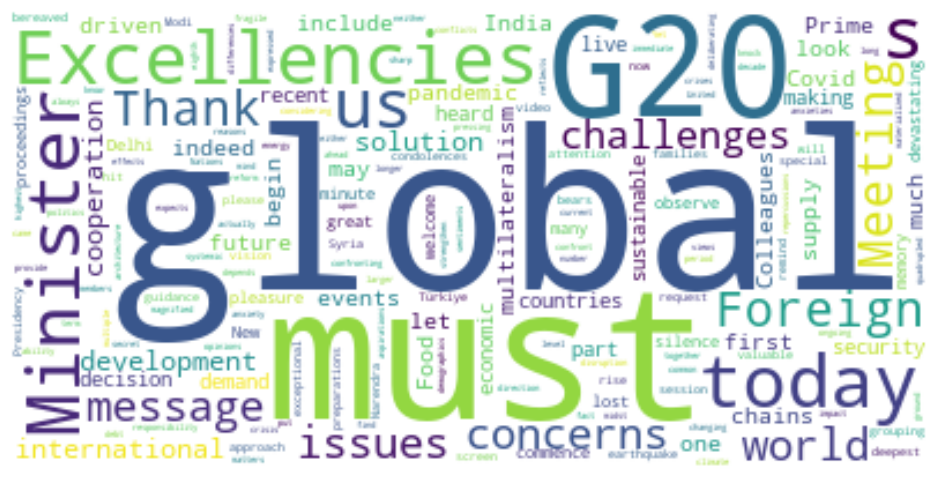

In [213]:
plt.figure(figsize = (12,6))
plt.axis("off")
plt.imshow(wc6B, interpolation="bilinear")
plt.show()